<a href="https://colab.research.google.com/github/Hoangthang017/AI-TEMPO-StrokePrediction/blob/main/model/strokePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

# Data Visualization

## Git clone

In [1]:
!git clone https://github.com/Hoangthang017/AI-TEMPO-StrokePrediction.git

fatal: destination path 'AI-TEMPO-StrokePrediction' already exists and is not an empty directory.


In [2]:
!ls AI-TEMPO-StrokePrediction/dataset/train

README.md  train.csv


## import library

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from fancyimpute import IterativeImputer, KNN
from sklearn import preprocessing

## import data

In [62]:
raw_data=pd.read_csv('AI-TEMPO-StrokePrediction/dataset/train/train.csv')

In [63]:
data=raw_data.copy()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,77,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,84,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,91,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,99,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,121,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,72867,Male,16.0,0.0,0.0,No,Private,Unknown,99.49,22.0,Unknown,B,NaN,0
3996,72882,Male,47.0,0.0,0.0,Yes,Private,Rural,75.30,25.0,formerly smoked,B,1.79,0
3997,72911,Other,57.0,1.0,0.0,Yes,Private,Rural,129.54,60.9,smokes,AB,1.15,0
3998,72915,Female,45.0,0.0,0.0,Yes,Private,Unknown,172.33,45.3,formerly smoked,O,1.33,0


### Drop columns ID (don't use it )

In [64]:
data.drop(columns=['id'],inplace=True) 
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,Female,NaN,0.0,0.0,No,children,Unknown,85.81,18.6,Unknown,O,NaN,0
1,Male,55.0,0.0,0.0,Yes,Private,Urban,89.17,NaN,never smoked,B,1.59,0
2,Female,42.0,0.0,0.0,No,Private,Unknown,98.53,18.5,never smoked,B,NaN,0
3,Female,31.0,0.0,0.0,No,Private,Urban,108.89,52.3,Unknown,O,1.24,0
4,Female,38.0,0.0,0.0,Yes,Private,Unknown,91.44,NaN,Unknown,O,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,16.0,0.0,0.0,No,Private,Unknown,99.49,22.0,Unknown,B,NaN,0
3996,Male,47.0,0.0,0.0,Yes,Private,Rural,75.30,25.0,formerly smoked,B,1.79,0
3997,Other,57.0,1.0,0.0,Yes,Private,Rural,129.54,60.9,smokes,AB,1.15,0
3998,Female,45.0,0.0,0.0,Yes,Private,Unknown,172.33,45.3,formerly smoked,O,1.33,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4000 non-null   object 
 1   age                3893 non-null   float64
 2   hypertension       3770 non-null   float64
 3   heart_disease      3910 non-null   float64
 4   ever_married       4000 non-null   object 
 5   work_type          4000 non-null   object 
 6   Residence_type     4000 non-null   object 
 7   avg_glucose_level  3829 non-null   float64
 8   bmi                2884 non-null   float64
 9   smoking_status     4000 non-null   object 
 10  blood              3990 non-null   object 
 11  height             2928 non-null   float64
 12  stroke             4000 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 406.4+ KB


In [66]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,height,stroke
count,3893.000000,3770.000000,3910.000000,3829.000000,2884.000000,2928.000000,4000.000000
mean,43.071256,0.097613,0.055243,106.178062,28.887899,1.611831,0.032500
std,22.425944,0.296830,0.228483,45.048667,7.904179,0.149053,0.177346
min,0.080000,0.000000,0.000000,55.220000,11.300000,0.910000,0.000000
25%,25.000000,0.000000,0.000000,77.500000,23.500000,1.520000,0.000000
50%,45.000000,0.000000,0.000000,92.110000,28.000000,1.630000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.000000,1.722500,0.000000
max,82.000000,1.000000,1.000000,267.760000,97.600000,1.850000,1.000000


In [67]:
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,1116,0.27900
height,1072,0.26800
hypertension,230,0.05750
avg_glucose_level,171,0.04275
age,107,0.02675
heart_disease,90,0.02250
blood,10,0.00250
stroke,0,0.00000
smoking_status,0,0.00000
Residence_type,0,0.00000


### describe of missing data
* **bmi**: Chỉ số BMI - Dạng số.
* **height**: Chiều cao bệnh nhân - Dạng số.
* **hypertension**: Tiền sử về cao huyết áp - Dạng số.
* **avg_glucose_level**: Lượng glucose trung bình có trong người - Dạng số.
* **age**: Tuổi bệnh nhân - Dạng số.
* **heart_disease**: Tiền sử bệnh tim - Dạng số.
* **blood**: Nhóm máu của bệnh nhân - Dạng string.



Theo quan sát bảng trên ta có thể thấy số lượng dữ liệu bị thiếu ở cột blood = 10 khá ít ta có thể bỏ qua cái hàng data này

In [68]:
data = data.dropna(subset=['blood'])
draw_missing_data_table(data)

,Total,Percent
bmi,1116,0.279699
height,1068,0.267669
hypertension,230,0.057644
avg_glucose_level,171,0.042857
age,107,0.026817
heart_disease,90,0.022556
stroke,0,0.000000
blood,0,0.000000
smoking_status,0,0.000000
Residence_type,0,0.000000


### get standard data

In [69]:
# standard_data = data.copy()
# standard_data = standard_data.dropna()
# standard_data.to_csv('/content/AI-TEMPO-StrokePrediction/dataset/standard_data/standard_data.csv')
# standard_data

## Handed missing data

In [70]:
missing_data_columns = ['bmi','height','hypertension','avg_glucose_level','age','heart_disease']
missing_data = data.copy()[missing_data_columns]
missing_data

,bmi,height,hypertension,avg_glucose_level,age,heart_disease
0,18.6,NaN,0.0,85.81,NaN,0.0
1,NaN,1.59,0.0,89.17,55.0,0.0
2,18.5,NaN,0.0,98.53,42.0,0.0
3,52.3,1.24,0.0,108.89,31.0,0.0
4,NaN,NaN,0.0,91.44,38.0,0.0
...,...,...,...,...,...,...
3995,22.0,NaN,0.0,99.49,16.0,0.0
3996,25.0,1.79,0.0,75.30,47.0,0.0
3997,60.9,1.15,1.0,129.54,57.0,0.0
3998,45.3,1.33,0.0,172.33,45.0,0.0


### Using IterativeImputer

In [71]:
# calling the  MICE class
mice_imputer = IterativeImputer()

# imputing the missing value with mice imputer
df = pd.DataFrame(mice_imputer.fit_transform(missing_data), columns = missing_data.columns) 
  
# printing dataframe
print(df)

            bmi    height  ...        age  heart_disease
0     18.600000  1.897328  ...  30.932279            0.0
1     32.514292  1.590000  ...  55.000000            0.0
2     18.500000  1.897100  ...  42.000000            0.0
3     52.300000  1.240000  ...  31.000000            0.0
4     28.786652  1.676108  ...  38.000000            0.0
...         ...       ...  ...        ...            ...
3985  22.000000  1.827633  ...  16.000000            0.0
3986  25.000000  1.790000  ...  47.000000            0.0
3987  60.900000  1.150000  ...  57.000000            0.0
3988  45.300000  1.330000  ...  45.000000            0.0
3989  30.300000  1.620000  ...  53.000000            0.0

[3990 rows x 6 columns]


In [72]:
for key in missing_data_columns:
  data[key] = np.where(data[key] == np.nan, data[key], df[key])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,Female,30.932279,0.0,0.0,No,children,Unknown,85.81,18.600000,Unknown,O,1.897328,0
1,Male,55.000000,0.0,0.0,Yes,Private,Urban,89.17,32.514292,never smoked,B,1.590000,0
2,Female,42.000000,0.0,0.0,No,Private,Unknown,98.53,18.500000,never smoked,B,1.897100,0
3,Female,31.000000,0.0,0.0,No,Private,Urban,108.89,52.300000,Unknown,O,1.240000,0
4,Female,38.000000,0.0,0.0,Yes,Private,Unknown,91.44,28.786652,Unknown,O,1.676108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,Male,16.000000,0.0,0.0,No,Private,Unknown,99.49,22.000000,Unknown,B,1.827633,0
3996,Male,47.000000,0.0,0.0,Yes,Private,Rural,75.30,25.000000,formerly smoked,B,1.790000,0
3997,Other,57.000000,1.0,0.0,Yes,Private,Rural,129.54,60.900000,smokes,AB,1.150000,0
3998,Female,45.000000,0.0,0.0,Yes,Private,Unknown,172.33,45.300000,formerly smoked,O,1.330000,0


In [90]:
le = preprocessing.LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])
data['blood'] = le.fit_transform(data['blood'])

In [91]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,blood,height,stroke
0,0,30.932279,0.0,0.0,0,4,1,85.81,18.600000,0,3,1.897328,0
1,1,55.000000,0.0,0.0,1,2,2,89.17,32.514292,2,2,1.590000,0
2,0,42.000000,0.0,0.0,0,2,1,98.53,18.500000,2,2,1.897100,0
3,0,31.000000,0.0,0.0,0,2,2,108.89,52.300000,0,3,1.240000,0
4,0,38.000000,0.0,0.0,1,2,1,91.44,28.786652,0,3,1.676108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,16.000000,0.0,0.0,0,2,1,99.49,22.000000,0,2,1.827633,0
3996,1,47.000000,0.0,0.0,1,2,0,75.30,25.000000,1,2,1.790000,0
3997,2,57.000000,1.0,0.0,1,2,0,129.54,60.900000,3,1,1.150000,0
3998,0,45.000000,0.0,0.0,1,2,1,172.33,45.300000,1,3,1.330000,0


In [92]:
data.to_csv('/content/AI-TEMPO-StrokePrediction/dataset/train/client_data.csv')

### Using KNN

In [ ]:
# # calling the KNN class
# knn_imputer = KNN()

# # imputing the missing value with knn imputer
# df = pd.DataFrame(knn_imputer.fit_transform(mice_imputer.fit_transform(missing_data)), columns = missing_data_columns)
  
# # printing dataframe
# print(df)

In [ ]:
# for key in missing_data_columns:
#   data[key] = np.where(data[key] == np.nan, data[key], df[key])
# data

In [85]:
data_numerical = data[['age','avg_glucose_level','bmi','height']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status','blood' ,'stroke']]

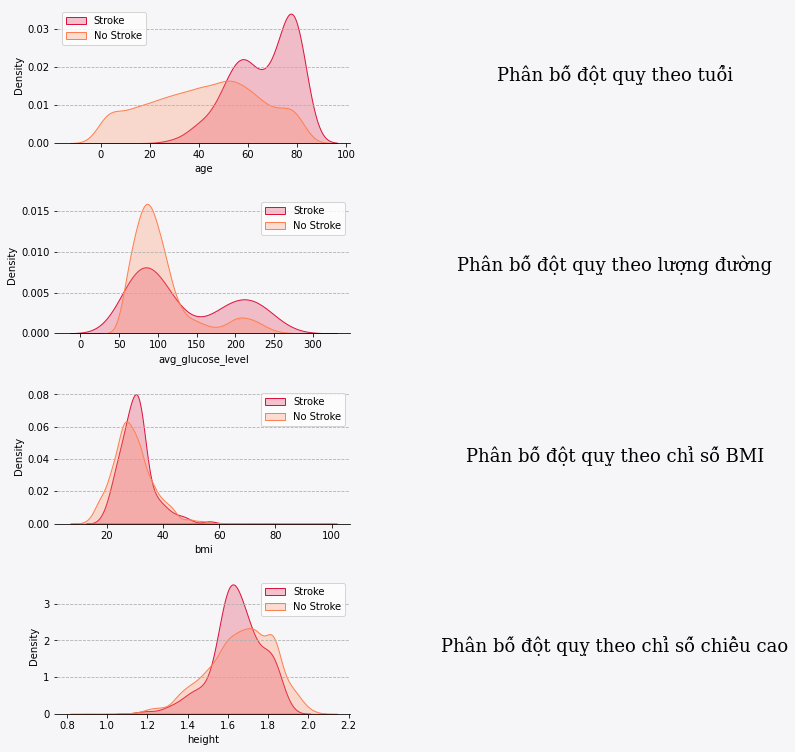

In [88]:
fig = plt.figure(figsize=(20,13))
gs = fig.add_gridspec(4,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax0,x=data.loc[data['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')

ax1.text(0.5,0.5,'Phân bố đột quỵ theo tuổi',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax2,x=data.loc[data['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')

ax3.text(0.5,0.5,'Phân bố đột quỵ theo lượng đường',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')


sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax4,x=data.loc[data['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')

ax5.text(0.5,0.5,'Phân bố đột quỵ theo chỉ số BMI',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')

sns.kdeplot(ax=ax6,x=data.loc[data['stroke']==1]['height'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(ax=ax6,x=data.loc[data['stroke']==0]['height'],color='coral',label='No Stroke',shade=True)
ax6.legend(loc = 'upper right')
ax6.grid(linestyle='--', axis='y')

ax7.text(0.5,0.5,'Phân bố đột quỵ theo chỉ số chiều cao',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18,fontfamily='serif')
# removing labels

axes1=[ax1,ax3,ax5, ax7]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)

# Training model

# Evaluate Model

# References